# Costumer service call prediction 

# Ali Khodadadi

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
#import ggplot
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import os
import warnings
import pylab
import calendar
#import rpy2
#import rpy2.robjects.packages as packages
#import rpy2.robjects.lib.ggplot2 as ggplot2
# fix random seed for reproducibility
np.random.seed(7)
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

# __Reading data__

In [2]:
train_data_e = pd.read_csv("./Trainindata_3.csv")  #reading data for data summary and exploratory data analysis
train_data = pd.read_csv("./Trainindata_3.csv")  #reading data for prediction

# Data Summary and Exploratory Data Analysis

In [4]:
train_data_e.head()

,datetime,holiday,workingday,temp,humidity,windspeed,season,weather,Calls
0,1/1/2014 00:00,0,0,9.84,81,0.0,1,1,1
1,1/1/2014 01:00,0,0,9.02,80,0.0,1,1,1
2,1/1/2014 02:00,0,0,9.02,80,0.0,1,1,1
3,1/1/2014 03:00,0,0,9.84,75,0.0,1,1,1
4,1/1/2014 04:00,0,0,9.84,75,0.0,1,1,1


Here we split date, month, weekday and hour:

In [3]:
train_data_e["date"] = train_data_e.datetime.apply(lambda x : x.split()[0])
train_data_e["year"] = train_data_e.datetime.apply(lambda x : x.split()[0].split("/")[2])
train_data_e["month"] = train_data_e.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%m/%d/%Y").month])
train_data_e["weekday"] = train_data_e.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%m/%d/%Y").weekday()])
train_data_e["hour"] = train_data_e.datetime.apply(lambda x : x.split()[1].split(":")[0])
#train_data_e=train_data_e.drop(["date"],axis=1)  
train_data_e.head()

,datetime,holiday,workingday,temp,humidity,windspeed,season,weather,Calls,date,year,month,weekday,hour
0,1/1/2014 00:00,0,0,9.84,81,0.0,1,1,1,1/1/2014,2014,January,Wednesday,00
1,1/1/2014 01:00,0,0,9.02,80,0.0,1,1,1,1/1/2014,2014,January,Wednesday,01
2,1/1/2014 02:00,0,0,9.02,80,0.0,1,1,1,1/1/2014,2014,January,Wednesday,02
3,1/1/2014 03:00,0,0,9.84,75,0.0,1,1,1,1/1/2014,2014,January,Wednesday,03
4,1/1/2014 04:00,0,0,9.84,75,0.0,1,1,1,1/1/2014,2014,January,Wednesday,04


We change seasons from numbers to their actual names:

In [94]:
train_data_e["season"] = train_data_e.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
train_data_e.head()

,datetime,holiday,workingday,temp,humidity,windspeed,season,weather,Calls,year,month,weekday,hour
0,1/1/2014 00:00,0,0,9.84,81,0.0,Spring,1,1,2014,January,Wednesday,00
1,1/1/2014 01:00,0,0,9.02,80,0.0,Spring,1,1,2014,January,Wednesday,01
2,1/1/2014 02:00,0,0,9.02,80,0.0,Spring,1,1,2014,January,Wednesday,02
3,1/1/2014 03:00,0,0,9.84,75,0.0,Spring,1,1,2014,January,Wednesday,03
4,1/1/2014 04:00,0,0,9.84,75,0.0,Spring,1,1,2014,January,Wednesday,04


We change weather from numbers to their actual definition:

In [95]:
train_data_e["weather"] = train_data_e.weather.map({1: " Clear",\
                                                    2 : " Cloudy", \
                                                    3 : " Light Rain", \
                                                    4 :" Heavy Rain" })
train_data_e.head()

,datetime,holiday,workingday,temp,humidity,windspeed,season,weather,Calls,year,month,weekday,hour
0,1/1/2014 00:00,0,0,9.84,81,0.0,Spring,Clear,1,2014,January,Wednesday,00
1,1/1/2014 01:00,0,0,9.02,80,0.0,Spring,Clear,1,2014,January,Wednesday,01
2,1/1/2014 02:00,0,0,9.02,80,0.0,Spring,Clear,1,2014,January,Wednesday,02
3,1/1/2014 03:00,0,0,9.84,75,0.0,Spring,Clear,1,2014,January,Wednesday,03
4,1/1/2014 04:00,0,0,9.84,75,0.0,Spring,Clear,1,2014,January,Wednesday,04


In [96]:
train_data_e.dtypes

datetime       object
holiday         int64
workingday      int64
temp          float64
humidity        int64
windspeed     float64
season         object
weather        object
Calls           int64
year           object
month          object
weekday        object
hour           object
dtype: object

Here we change the type of some variables to catagorical:

In [97]:
list_of_cat_vars = ["holiday","workingday","season","weather","year","month","weekday","hour"]
for var_index in list_of_cat_vars:
    train_data_e[var_index] = train_data_e[var_index].astype("category")

In [5]:
train_data_e.head()

,datetime,holiday,workingday,temp,humidity,windspeed,season,weather,Calls,date,year,month,weekday,hour
0,1/1/2014 00:00,0,0,9.84,81,0.0,1,1,1,1/1/2014,2014,January,Wednesday,00
1,1/1/2014 01:00,0,0,9.02,80,0.0,1,1,1,1/1/2014,2014,January,Wednesday,01
2,1/1/2014 02:00,0,0,9.02,80,0.0,1,1,1,1/1/2014,2014,January,Wednesday,02
3,1/1/2014 03:00,0,0,9.84,75,0.0,1,1,1,1/1/2014,2014,January,Wednesday,03
4,1/1/2014 04:00,0,0,9.84,75,0.0,1,1,1,1/1/2014,2014,January,Wednesday,04


In [99]:
train_data_e.dtypes

datetime        object
holiday       category
workingday    category
temp           float64
humidity         int64
windspeed      float64
season        category
weather       category
Calls            int64
year          category
month         category
weekday       category
hour          category
dtype: object

Here we add a variable (time_stamp) which shows hour in our dataset (it starts from 0) and then we dropped "datetime" column:

In [100]:
train_data_e = train_data_e.reset_index()
train_data_e = train_data_e.rename(columns = {'index':'time_stamp'})
train_data_e  = train_data_e.drop(["datetime"],axis=1)    
train_data_e.head()

,time_stamp,holiday,workingday,temp,humidity,windspeed,season,weather,Calls,year,month,weekday,hour
0,0,0,0,9.84,81,0.0,Spring,Clear,1,2014,January,Wednesday,00
1,1,0,0,9.02,80,0.0,Spring,Clear,1,2014,January,Wednesday,01
2,2,0,0,9.02,80,0.0,Spring,Clear,1,2014,January,Wednesday,02
3,3,0,0,9.84,75,0.0,Spring,Clear,1,2014,January,Wednesday,03
4,4,0,0,9.84,75,0.0,Spring,Clear,1,2014,January,Wednesday,04


Using missingno package we can see if there is any missing data, as you can see in the follwoing graph all of variables have 8645 observations, so there is no missing data.

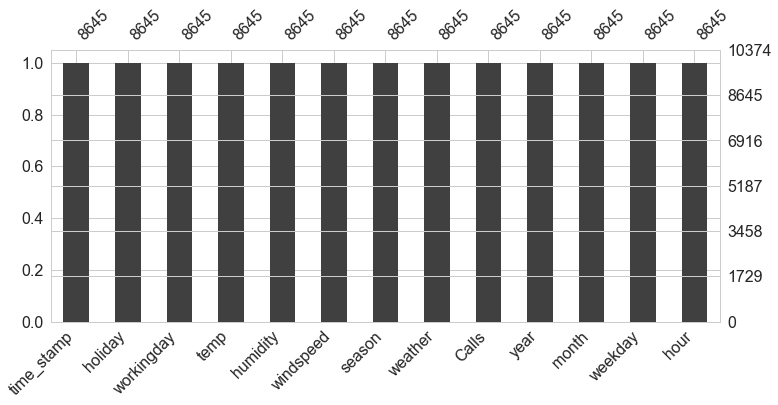

In [101]:
msno.bar(train_data_e,figsize=(12,5))

# Plotting Data

We plot the scatter plot of calls:

[<matplotlib.text.Text at 0x45d9c400>, None]

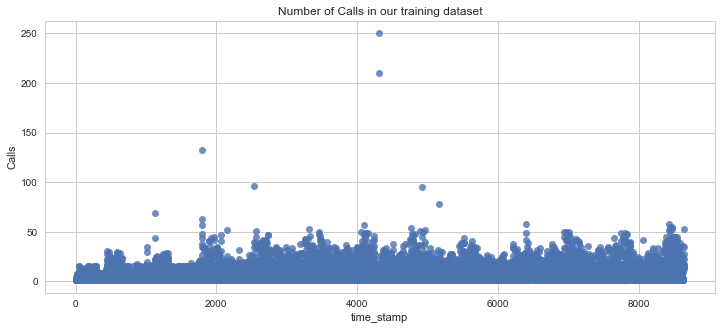

In [102]:
sns.set_style("whitegrid")

fig,(ax1) = plt.subplots(ncols=1)
fig.set_size_inches(12, 5)
sns.regplot(x="time_stamp", y="Calls", data=train_data_e,ax=ax1, fit_reg=False)
ax1.set( title='Number of Calls in our training dataset',label='big')

Histogram:

As we can see there are quite a few outliers, we plot the histogram and probability plot which shows the distribution of Calls against normal distribution in the following:

 None]

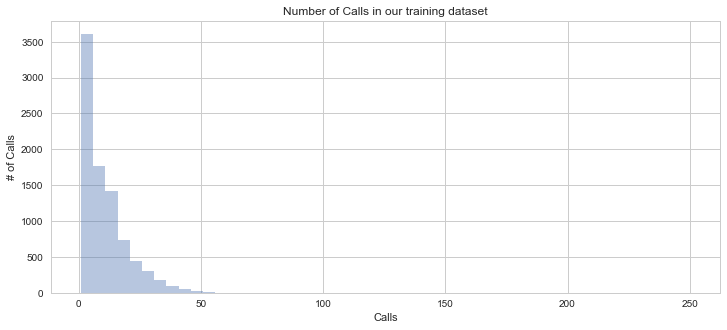

In [103]:
fig,(ax1) = plt.subplots(ncols=1)
fig.set_size_inches(12, 5)
sns.distplot( train_data_e["Calls"],ax=ax1,kde=False)
ax1.set( ylabel='# of Calls',title='Number of Calls in our training dataset',label='big')

((array([-3.77446486, -3.54728323, -3.42246374, ...,  3.42246374,
          3.54728323,  3.77446486]),
  array([  1,   1,   1, ..., 132, 210, 250], dtype=int64)),
 (8.9165948159606714, 10.090572585309426, 0.87767040356447912))

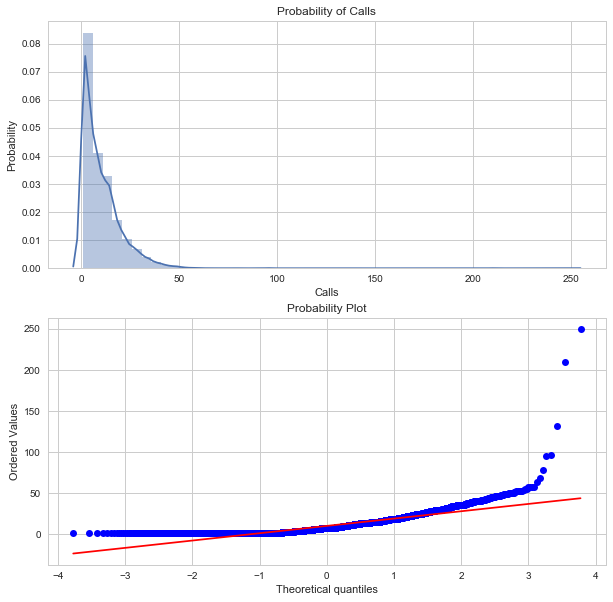

In [104]:
fig,axes = plt.subplots(nrows=2)
fig.set_size_inches(10, 10)
sns.distplot(train_data_e["Calls"],ax=axes[0])
axes[0].set( ylabel='Probability',title="Probability of Calls",label='big')
stats.probplot(train_data_e["Calls"], dist=stats.norm,  fit=True, plot=axes[1])

It can be seen our response variable (Calls) is skewed toward right and the distribution is like log-normal distribution. Moreover, we have quite a few number of outliers. Possibly, we can correct for this for taking log transformation:

((array([-3.77446486, -3.54728323, -3.42246374, ...,  3.42246374,
          3.54728323,  3.77446486]),
  array([ 0.        ,  0.        ,  0.        , ...,  4.88280192,
          5.34710753,  5.52146092])),
 (1.0652429011653117, 1.8019492993571786, 0.96953653784219573))

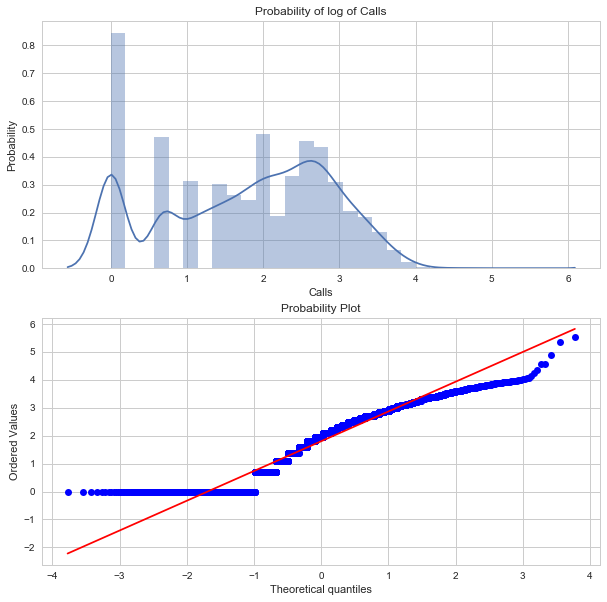

In [105]:
fig,axes = plt.subplots(nrows=2)
fig.set_size_inches(10, 10)
sns.distplot(np.log(train_data_e["Calls"]),ax=axes[0])
axes[0].set( ylabel='Probability',title="Probability of log of Calls",label='big')
stats.probplot(np.log(train_data_e["Calls"]), dist=stats.norm,  fit=True, plot=axes[1])

It can be seen our "Calls" is much closer to normal distribution after log transformation. One can also take out outliers, but we don't do that here.

__Box Plots__

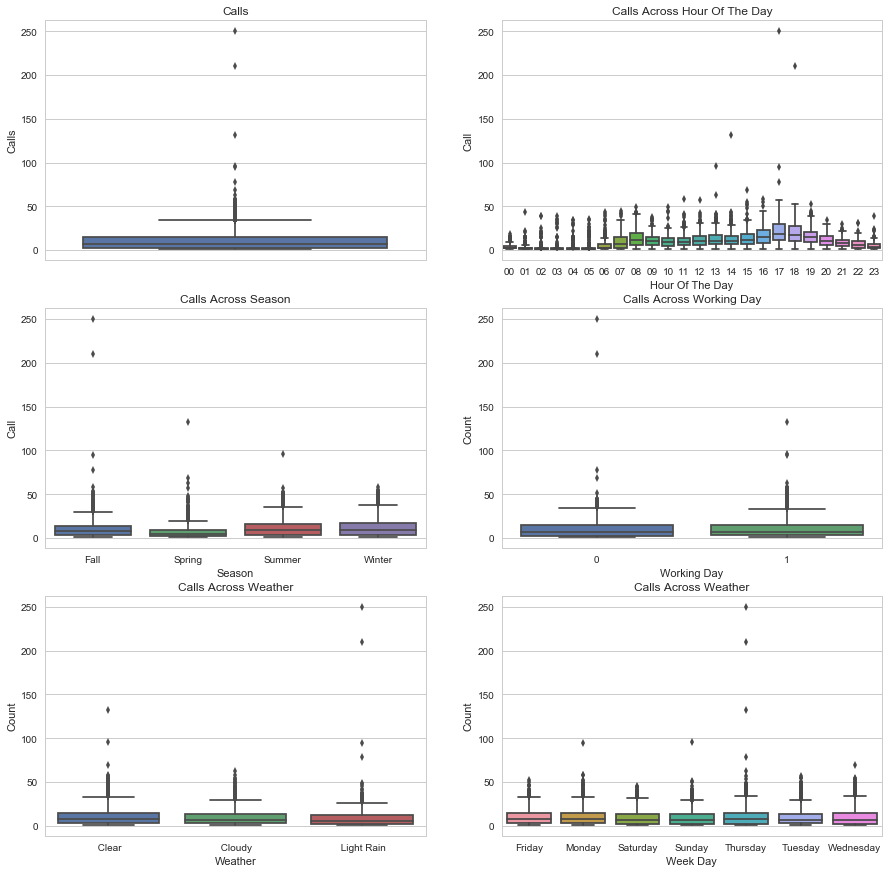

In [106]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 15)
sns.boxplot(data=train_data_e,y="Calls",ax=axes[0][0])
axes[0][0].set(ylabel='Calls',title="Calls")

sns.boxplot(data=train_data_e,y="Calls",x="hour",ax=axes[0][1])
axes[0][1].set(xlabel='Hour Of The Day', ylabel='Call',title="Calls Across Hour Of The Day")

sns.boxplot(data=train_data_e,y="Calls",x="season",ax=axes[1][0])
axes[1][0].set(xlabel='Season', ylabel='Call',title="Calls Across Season")

sns.boxplot(data=train_data_e,y="Calls",x="workingday",ax=axes[1][1])
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Calls Across Working Day")

sns.boxplot(data=train_data_e,y="Calls",x="weather",ax=axes[2][0])
axes[2][0].set(xlabel='Weather', ylabel='Count',title="Calls Across Weather")


sns.boxplot(data=train_data_e,y="Calls",x="weekday",ax=axes[2][1])
axes[2][1].set(xlabel='Week Day', ylabel='Count',title="Calls Across Weather")

In the upper left graph, we can see there are a lot of outliers for "Calls" which results in skewness toward right as we saw in the previous graph.

In Hour of the Day boxplot, it can be seen that the median values are higher at around 8 am and 5 pm which can be explained by waking up and coming back from work. Moreover, there are some very big outliers in 5 and 6 pm. 

By seeing seasons, we can see Spring has relatively lower Calls, and Summer has relatively higher Calls which can be due to the higher consumption of electricity in Summer.

We can see most of outliers are related to "working days", however, the outliers from "non-working days" have higher values.

Moreover, we can see there are much more outliers in "Light Rain" compared with other weather situations.

Finally,  we can see there are relatively fewer calls during weekends, and we have higher outliers in Thursdays. 

__Data Visualization__

 None]

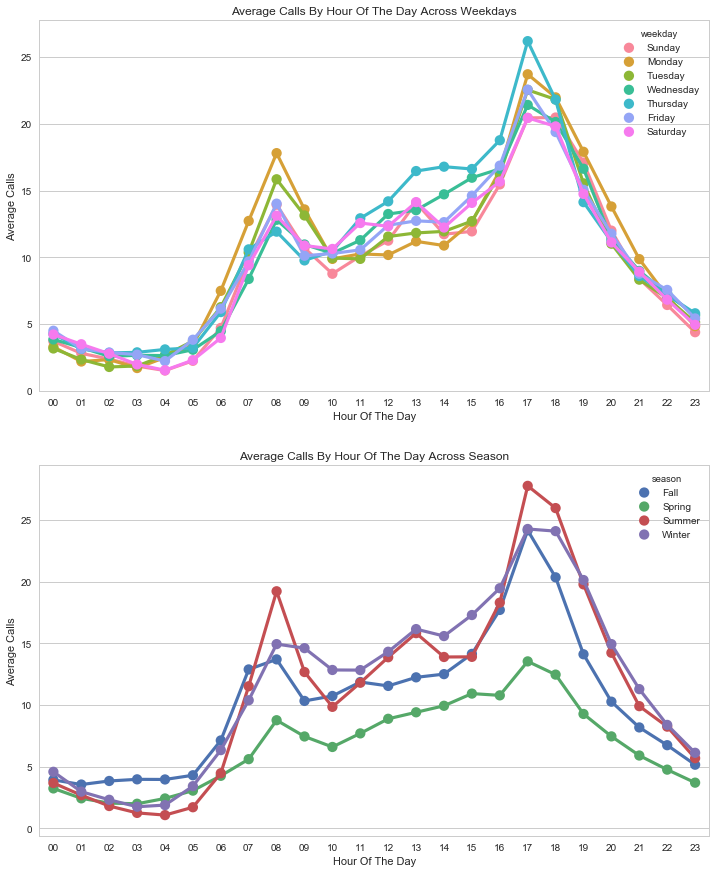

In [107]:
fig,(ax1,ax2)= plt.subplots(nrows=2)

fig.set_size_inches(12,15)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]


hourAggregated = pd.DataFrame(train_data_e.groupby(["hour","weekday"],sort=True)["Calls"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["Calls"],hue=hourAggregated["weekday"],hue_order=hueOrder, data=hourAggregated, join=True,ax=ax1)
ax1.set(xlabel='Hour Of The Day', ylabel='Average Calls',title="Average Calls By Hour Of The Day Across Weekdays",label='big')


hourAggregated = pd.DataFrame(train_data_e.groupby(["hour","season"],sort=True)["Calls"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["Calls"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Average Calls',title="Average Calls By Hour Of The Day Across Season",label='big')


#monthAggregated = pd.DataFrame(train_data_e.groupby("month")["Calls"].mean()).reset_index()
#monthSorted = monthAggregated.sort_values(by="Calls",ascending=False)
#sns.barplot(data=monthSorted,x="month",y="Calls",ax=ax3,order=sortOrder)
#ax3.set(xlabel='Month', ylabel='Avearage Calls',title="Average Calls By Month")


#monthAggregated = pd.DataFrame(train_data_e.groupby("month")["windspeed"].mean()).reset_index()
#monthSorted = monthAggregated.sort_values(by="windspeed",ascending=False)
#sns.barplot(data=monthSorted,x="month",y="windspeed",ax=ax4,order=sortOrder)
#ax4.set(xlabel='Month', ylabel='Avearage Calls',title="Average Calls By Month")


We can see there are two peaks in each day: one around 8 am and the other one around 5-6 pm which are probably due to wake up and coming back from work. The evening peak is slightly higher in Thursdays.

We see the same pattern of peaks in different seasons, summer has the highest peak and spring has the lowest one.



__Correlations__

We use the actual data (before transforming catargorical variables to their names) and calculate correlation matrix:

In [108]:

train_data["date"] = train_data.datetime.apply(lambda x : x.split()[0])
train_data["month"] = train_data.date.apply(lambda dateString : datetime.strptime(dateString,"%m/%d/%Y").month)
train_data["weekday"] = train_data.date.apply(lambda dateString : datetime.strptime(dateString,"%m/%d/%Y").weekday())
train_data["hour"] = train_data.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")

In [109]:
cor_mat=train_data.corr()
cor_mat

,holiday,workingday,temp,humidity,windspeed,season,weather,Calls,month,weekday,hour
holiday,1.000000,-0.235066,0.001541,0.019248,0.000989,0.068487,0.014044,0.000397,0.040650,0.026841,-0.001706
workingday,-0.235066,1.000000,0.045828,-0.026784,0.023389,-0.014628,0.031073,-0.002055,-0.012540,-0.124982,0.006197
temp,0.001541,0.045828,1.000000,-0.098545,0.000001,0.230624,-0.062601,0.272937,0.230138,0.019006,0.131641
humidity,0.019248,-0.026784,-0.098545,1.000000,-0.297159,0.185015,0.410377,-0.280943,0.188036,0.060444,-0.256743
windspeed,0.000989,0.023389,0.000001,-0.297159,1.000000,-0.135740,0.031632,0.319660,-0.136398,-0.040720,0.123958
season,0.068487,-0.014628,0.230624,0.185015,-0.135740,1.000000,-0.018878,0.146289,0.971026,-0.005381,-0.011579
weather,0.014044,0.031073,-0.062601,0.410377,0.031632,-0.018878,1.000000,-0.056027,-0.018796,0.003957,-0.015339
Calls,0.000397,-0.002055,0.272937,-0.280943,0.319660,0.146289,-0.056027,1.000000,0.147606,-0.020602,0.320466
month,0.040650,-0.012540,0.230138,0.188036,-0.136398,0.971026,-0.018796,0.147606,1.000000,-0.006286,-0.011814
weekday,0.026841,-0.124982,0.019006,0.060444,-0.040720,-0.005381,0.003957,-0.020602,-0.006286,1.000000,0.001664


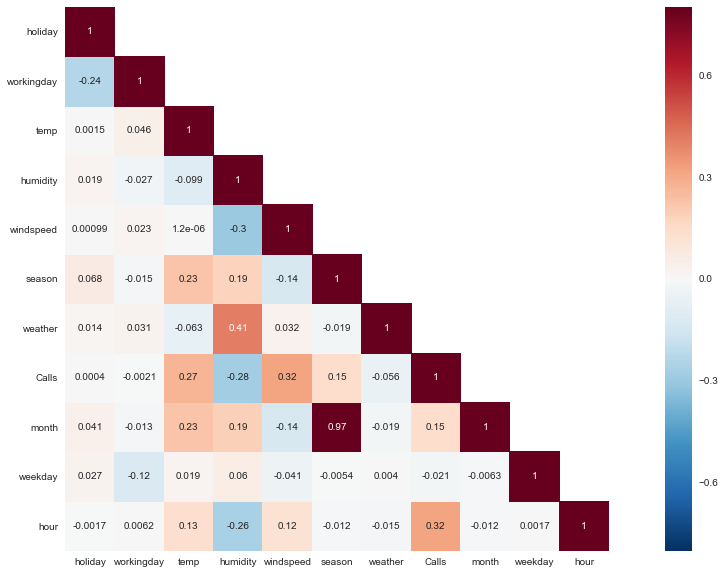

In [110]:
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(cor_mat, mask=mask,vmax=.8, square=True,annot=True)

We can see windspeed, temp and humidity has the highest correlation with number of Calls.

We dropped date datetime and date:

In [111]:
features_to_drop=["datetime","date"]
train_data  = train_data.drop(features_to_drop,axis=1)
train_data.head()

,holiday,workingday,temp,humidity,windspeed,season,weather,Calls,month,weekday,hour
0,0,0,9.84,81,0.0,1,1,1,1,2,0
1,0,0,9.02,80,0.0,1,1,1,1,2,1
2,0,0,9.02,80,0.0,1,1,1,1,2,2
3,0,0,9.84,75,0.0,1,1,1,1,2,3
4,0,0,9.84,75,0.0,1,1,1,1,2,4


We read test dataset and prepare it:

In [166]:

test_data = pd.read_csv("./Testdata_3.csv")
test_data["date"] = test_data.datetime.apply(lambda x : x.split()[0])
test_data["month"] = test_data.date.apply(lambda dateString : datetime.strptime(dateString,"%m/%d/%Y").month)
test_data["weekday"] = test_data.date.apply(lambda dateString : datetime.strptime(dateString,"%m/%d/%Y").weekday())
test_data["hour"] = test_data.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
test_data  = test_data.drop(features_to_drop,axis=1)

Making test and training datasets:

In [167]:
ytrain=train_data.ix[:,train_data.columns=='Calls']
Xtrain=train_data.ix[:,train_data.columns != 'Calls']

ytest=test_data.ix[:,test_data.columns=='Calls']
Xtest=test_data.ix[:,test_data.columns != 'Calls']

Since we have catagorical data, here we used OneHotEncoder to encode our datasets:

In [168]:
from sklearn.preprocessing import OneHotEncoder 

encoder = OneHotEncoder()
Xtrain_cat=Xtrain[["holiday","workingday","season","weather","month","weekday","hour"]]
Xtrain_num=Xtrain[['temp','humidity','windspeed']]
Xtrain_cat_enc=encoder.fit_transform(Xtrain_cat).toarray()
Xtrain_en=np.concatenate((Xtrain_num, Xtrain_cat_enc), axis = 1)

Xtest_cat=Xtest[["holiday","workingday","season","weather","month","weekday","hour"]]
Xtest_num=Xtest[['temp','humidity','windspeed']]
Xtest_cat_enc=encoder.fit_transform(Xtest_cat).toarray()
Xtest_en=np.concatenate((Xtest_num, Xtest_cat_enc), axis = 1)

__Linear Regression__

In [169]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
#warnings.filterwarnings("ignore", category=DeprecationWarning)


ols = LinearRegression()

#making log variables
ytrain_log = np.log1p(ytrain)
ytest_log = np.log1p(ytest)

#train the model
ols.fit(X = Xtrain,y = ytrain_log) 

# Make predictions
ols_preds = ols.predict(X= Xtest)

R squared:

In [170]:
print "R squared Value For Linear Regression: ",metrics.r2_score(ytest_log, ols_preds)

R squared Value For Linear Regression:  0.429381086914


Mean Squared Error:

In [171]:
print "MSRE Value For Linear Regression: ",metrics.mean_squared_error(ytest_log,ols_preds)

MSRE Value For Linear Regression:  0.497768995542


Here, we run the same model with OneHotEncode since these encoding scheme usually do better in different algorithms:

In [173]:
ols.fit(X = Xtrain_en,y = ytrain_log) 
ols_preds = ols.predict(X= Xtest_en)

print "R squared Value For Linear Regression: ",metrics.r2_score(ytest_log, ols_preds)
print "MSRE Value For Linear Regression: ",metrics.mean_squared_error(ytest_log,ols_preds)

R squared Value For Linear Regression:  0.700134316042
MSRE Value For Linear Regression:  0.261582357118


We can see the model improved significantly with OneHotEncode.

__Regulariztion model-Ridge__

We use Ridge regression and we also hyper-tune ridge parameter and then fit and predict:

In [174]:
ridge_model = Ridge()
#parameters
ridge_params_ = { 'alpha':[1e-2,1e-1,1,1e1,1e2,1e3,1e4,1e5,1e6]}

#finding the best parameters based on RMSE and 5-fold CV
grid_ridge_m = GridSearchCV( ridge_model,
                          ridge_params_,
                          scoring = 'mean_squared_error',
                          cv=5)

grid_ridge_m_f=grid_ridge_m.fit( Xtrain, ytrain_log )
ridge_preds = grid_ridge_m.predict(X= Xtest)
print (grid_ridge_m.best_params_)


{'alpha': 10000.0}


The optimal parameter is 10,000

In [175]:
print "R squared Value For Linear Regression: ",metrics.r2_score(ytest_log, ridge_preds)
print "RMSE Value For Linear Regression: ",metrics.mean_squared_error(ytest_log,ridge_preds)

R squared Value For Linear Regression:  0.428586428915
RMSE Value For Linear Regression:  0.498462200946


We can plot RMSE vs. ridge parameter and see the optimal value:

[<matplotlib.text.Text at 0x1802c048>, None]

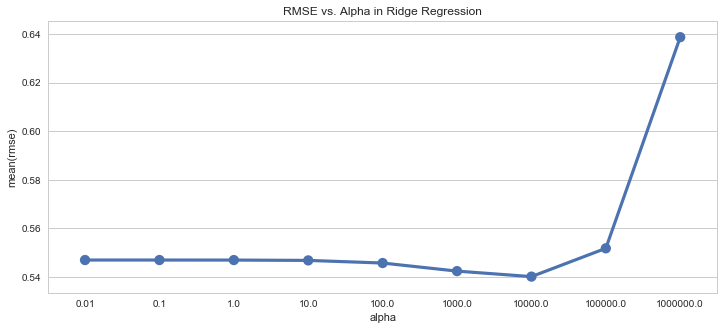

In [176]:
fig,ax= plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_ridge_m.grid_scores_)
df["alpha"] = df["parameters"].apply(lambda x:x["alpha"])
df["rmse"] = df["mean_validation_score"].apply(lambda x:-x)
sns.pointplot(data=df,x="alpha",y="rmse",ax=ax)
ax.set(title="RMSE vs. Alpha in Ridge Regression",label='big')

Again, we do Ridge regression on OneHotEncoded data:

In [177]:
#finding the best parameters based on RMSE and 5-fold CV
grid_ridge_m = GridSearchCV( ridge_model,
                          ridge_params_,
                          scoring = 'mean_squared_error',
                          cv=5)

grid_ridge_m.fit( Xtrain_en, ytrain_log )
ridge_preds = grid_ridge_m.predict(X= Xtest_en)
print (grid_ridge_m.best_params_)


{'alpha': 10.0}


In [178]:
print "R squared Value For Linear Regression: ",metrics.r2_score(ytest_log, ridge_preds)
print "RMSE Value For Linear Regression: ",metrics.mean_squared_error(ytest_log,ridge_preds)

R squared Value For Linear Regression:  0.695306368591
RMSE Value For Linear Regression:  0.265793928972


Again, We see the model performs much better with OneHotEncode. The following graph also shows Ridge regression parameter vs. RMSE.

[<matplotlib.text.Text at 0x1807b1d0>, None]

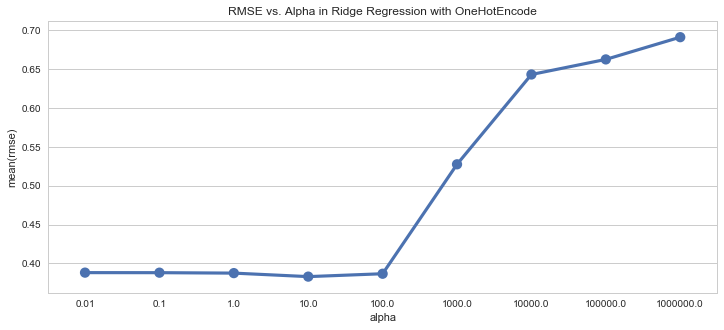

In [179]:
fig,ax= plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_ridge_m.grid_scores_)
df["alpha"] = df["parameters"].apply(lambda x:x["alpha"])
df["rmse"] = df["mean_validation_score"].apply(lambda x:-x)
sns.pointplot(data=df,x="alpha",y="rmse",ax=ax)
ax.set(title="RMSE vs. Alpha in Ridge Regression with OneHotEncode",label='big')

__Lasso Regression__

Optimal parameter:  {'alpha': 0.01}
R squared Value For Linear Regression:  0.695306368591
RMSE Value For Linear Regression:  0.265793928972


[<matplotlib.text.Text at 0x374d7b70>, None]

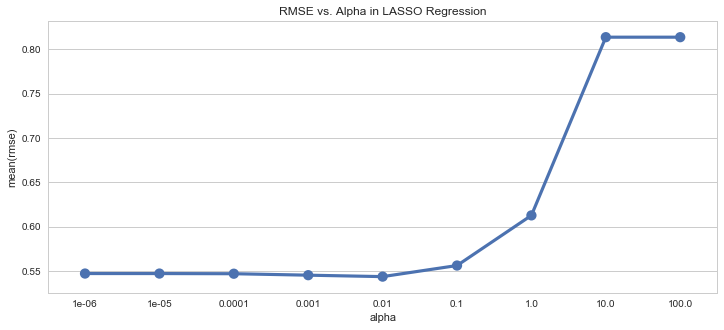

In [180]:
lasso_model = Lasso()

alpha  = 1/np.array([1e-2,1e-1,1,1e1,1e2,1e3,1e4,1e5,1e6])
lasso_params_ = { 'alpha':alpha}

grid_lasso_m = GridSearchCV( lasso_model,
                            lasso_params_,
                            scoring ='mean_squared_error',
                            n_jobs=-1,
                            cv=5)

grid_lasso_m.fit( Xtrain, ytrain_log )
lasso_preds = grid_lasso_m.predict(X= Xtest)
print "Optimal parameter: ",grid_lasso_m.best_params_
print "R squared Value For Linear Regression: ",metrics.r2_score(ytest_log, ridge_preds)
print "RMSE Value For Linear Regression: ",metrics.mean_squared_error(ytest_log,ridge_preds)

fig,ax= plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_lasso_m.grid_scores_)
df["alpha"] = df["parameters"].apply(lambda x:x["alpha"])
df["rmse"] = df["mean_validation_score"].apply(lambda x:-x)
sns.pointplot(data=df,x="alpha",y="rmse",ax=ax)
ax.set(title="RMSE vs. Alpha in LASSO Regression",label='big')

with OneHotEncode:

Optimal parameter:  {'alpha': 0.001}
R squared Value For Linear Regression:  0.695306368591
RMSE Value For Linear Regression:  0.265793928972


[<matplotlib.text.Text at 0x23ebb518>, None]

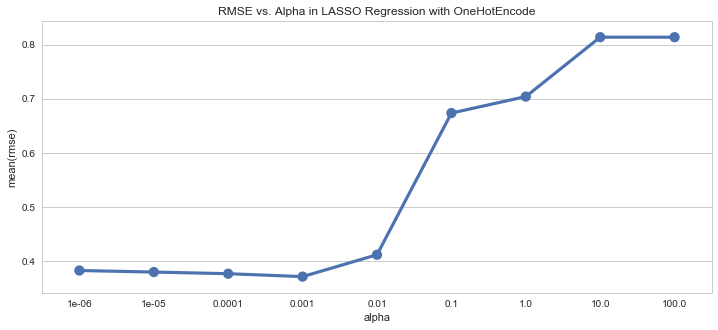

In [181]:
grid_lasso_m = GridSearchCV( lasso_model,
                            lasso_params_,
                            scoring ='mean_squared_error',
                            n_jobs=-1,
                            cv=5)

grid_lasso_m.fit( Xtrain_en, ytrain_log )
lasso_preds = grid_lasso_m.predict(X= Xtest_en)
print "Optimal parameter: ",grid_lasso_m.best_params_
print "R squared Value For Linear Regression: ",metrics.r2_score(ytest_log, ridge_preds)
print "RMSE Value For Linear Regression: ",metrics.mean_squared_error(ytest_log,ridge_preds)

fig,ax= plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_lasso_m.grid_scores_)
df["alpha"] = df["parameters"].apply(lambda x:x["alpha"])
df["rmse"] = df["mean_validation_score"].apply(lambda x:-x)
sns.pointplot(data=df,x="alpha",y="rmse",ax=ax)
ax.set(title="RMSE vs. Alpha in LASSO Regression with OneHotEncode",label='big')

__Ensemble Models - Random Forest__

For random forest we tune number of trees and depth of trees and predict our test data using tuned parameters:

In [183]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor()

rf_parameters= {'n_estimators': [10,100,500,1000], 'max_depth': [None, 1, 3]}

grid_rf = GridSearchCV(rfModel, 
                   rf_parameters, 
                   cv=5,
                   scoring='mean_squared_error',
                   n_jobs=-1, 
                   verbose=1)

grid_rf.fit(Xtrain,np.ravel(ytrain_log))
rf_preds = grid_rf.predict(X= Xtest)
print (grid_rf.best_params_)
print "R squared Value For Random Forest: ",metrics.r2_score(ytest_log, rf_preds)
print "RMSE Value For Random Forest: ",metrics.mean_squared_error(ytest_log,rf_preds)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.4min finished


{'n_estimators': 1000, 'max_depth': None}
R squared Value For Random Forest:  0.748522335619
RMSE Value For Random Forest:  0.219371951279


With OneHotEncoding:

In [184]:
grid_rf.fit(Xtrain_en,np.ravel(ytrain_log))
rf_preds = grid_rf.predict(X= Xtest_en)
print (grid_rf.best_params_)
print "R squared Value For Linear Regression: ",metrics.r2_score(ytest_log, rf_preds)
print "RMSE Value For Linear Regression: ",metrics.mean_squared_error(ytest_log,rf_preds)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  4.1min finished


{'n_estimators': 1000, 'max_depth': None}
R squared Value For Linear Regression:  0.730020993928
RMSE Value For Linear Regression:  0.23551125907


Since Random Forest can handle categorical values natively, OnehotEncoding does not help.

__Ensemble Model - Gradient Boost__

In [185]:
from sklearn.ensemble import GradientBoostingRegressor

#hyper tuning parameters 

max_depth=np.linspace(1,11,11)
gbm_params_ = {'n_estimators': [100,200,500,1000,2000,4000], 'max_depth':max_depth  }


gbm = GradientBoostingRegressor()

grid_gbm_m = GridSearchCV( gbm,gbm_params_,
                          scoring ='mean_squared_error',
                          n_jobs=-1,
                          cv=5)


grid_gbm_m.fit(Xtrain,np.ravel(ytrain_log))
gbm_preds = grid_gbm_m.predict(X= Xtest)
print (grid_gbm_m.best_params_)
print "R squared Value For GB: ",metrics.r2_score(ytest_log, gbm_preds)
print "RMSE Value For GB: ",metrics.mean_squared_error(ytest_log,gbm_preds)

{'n_estimators': 200, 'max_depth': 3}
R squared Value For GB:  0.762019448397
RMSE Value For GB:  0.207597991257


In [187]:
grid_gbm_m.fit(Xtrain_en,np.ravel(ytrain_log))
gbm_preds = grid_gbm_m.predict(X= Xtest_en)
print (grid_gbm_m.best_params_)
print "R squared Value For GB with encoded input: ",metrics.r2_score(ytest_log, gbm_preds)
print "MSRE Value For GB with encoded input: ",metrics.mean_squared_error(ytest_log,gbm_preds)

{'n_estimators': 1000, 'max_depth': 3}
R squared Value For GB with encoded input:  0.758895603291
MSRE Value For GB with encoded input:  0.210323020528


__Support Vector Regression__

With RBF kernel:

In [188]:
from sklearn.svm import SVR


C =[1e-1,1e1,1e2,1e3,1e4,1e5]
gamma  = 1/np.array([1,1e1,1e2,1e3])

svr_params_ = { 'C':C, 'gamma':gamma}


svr = SVR()

grid_svr_m = GridSearchCV( svr,svr_params_,
                          scoring ='mean_squared_error',
                          n_jobs=-1,
                          cv=5)

grid_svr_m.fit(Xtrain,np.ravel(ytrain_log))
svr_preds = grid_svr_m.predict(X= Xtest)
print (grid_svr_m.best_params_)



print "R squared Value For SVR with rbf kernel: ",metrics.r2_score(ytest_log, svr_preds)
print "RMSE Value For SVR with rbf kernel: ",metrics.mean_squared_error(ytest_log,svr_preds)

{'C': 10000, 'gamma': 0.1}
R squared Value For SVR with rbf kernel:  0.490059149401
RMSE Value For SVR with rbf kernel:  0.444837595052


With OneHotEncoding:

In [190]:
grid_svr_m.fit(Xtrain_en,np.ravel(ytrain_log))
svr_preds = grid_svr_m.predict(X= Xtest_en)
print (grid_svr_m.best_params_)


print "R squared Value For SVR with rbf kernel and encoding: ",metrics.r2_score(ytest_log, svr_preds)
print "RMSE Value For SVR with rbf kernel and encoding: ",metrics.mean_squared_error(ytest_log,svr_preds)

{'C': 10, 'gamma': 0.1}
R squared Value For SVR with rbf kernel and encoding:  0.395137819041
RMSE Value For SVR with rbf kernel and encoding:  0.527640485362


We can see OneHotEncode performance is worse than just using features without encoding.

__Neural Network__

We used "Keras" package to implement neural network. Keras is a high-level neural networks API, and it is capable of running on top of either TensorFlow or Theano (we use Theano here).

We tried many different setting, but for MLP network we found that having 3 hidden layer with batch stochastic gradient desent and softplus activation function which is a smooth approximation to ReLU can lead to a reasonale answer. We also tried sigmoid but its performance is pretty bad. 

In [194]:
from sklearn import metrics
#import sys
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD

In [195]:
Xtrain=Xtrain.as_matrix()
Xtest=Xtest.as_matrix()
ytrain_log=ytrain_log.as_matrix()
ytest_log=ytest_log.as_matrix()

In [208]:
from keras.optimizers import SGD

## create model
#keras.layers.core.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
##units is the number of units.

##Initializations define the way to set the initial random weights of Keras layers.
#'glorot_normal' draws samples from a truncated normal distribution centered on 0 with 

#activation 
model = Sequential()
model.add(Dense(10, input_dim=10, init='glorot_normal', activation='softplus'))
model.add(Dense(30, init='glorot_normal', activation='softplus'))
model.add(Dense(20, init='glorot_normal', activation='softplus'))
model.add(Dense(10, init='glorot_normal', activation='softplus'))
model.add(Dense(1, activation='softplus'))

## compile the model
SGD=SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
model.compile(loss='mse', optimizer='SGD', metrics=['accuracy'])

# print initial weights
weights = model.layers[0].get_weights()


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softplus", kernel_initializer="glorot_normal", input_dim=10)`
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="softplus", kernel_initializer="glorot_normal")`
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, activation="softplus", kernel_initializer="glorot_normal")`
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softplus", kernel_initializer="glorot_normal")`


In [209]:
model_status = model.fit(Xtrain, ytrain_log, nb_epoch = 100, batch_size=10, verbose=1 , validation_data=(Xtest, ytest_log))    

Train on 8645 samples, validate on 2278 samples
Epoch 1/100
8645/8645 [==============================] - 0s - loss: 0.5826 - acc: 0.0000e+00 - val_loss: 0.4540 - val_acc: 0.0000e+00

In [210]:
nn_pred=model.predict(Xtest)

In [211]:
print "R squared Value For NN: ",metrics.r2_score(ytest_log, nn_pred)
print "RMSE Value For NN: ",metrics.mean_squared_error(ytest_log,nn_pred)

R squared Value For NN:  0.640368764229
RMSE Value For NN:  0.313717745574


In [347]:
# plotting prediction
def train_history_prediction_plot(nepochs,Xtrain,ytrain_log,Xtest,ytest_log):
    
    # fit the model
    model_status = model.fit(Xtrain, ytrain_log, nb_epoch = nepochs, batch_size=20, verbose=1, 
              validation_data=(Xtest, ytest_log))
    
    # Plotting list all data in the model history
    print(model_status.history.keys())
    
    # summarize history for accuracy
    plt.plot(model_status.history['acc'])
    plt.plot(model_status.history['val_acc'])
    #plt.title('model accuracy')
    plt.ylabel('accuracy', fontsize=15)
    plt.xlabel('epoch', fontsize=15)
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    # summarize history for loss
    plt.plot(model_status.history['loss'])
    plt.plot(model_status.history['val_loss'])
    #plt.title('model loss')
    plt.ylabel('loss', fontsize=15)
    plt.xlabel('epoch', fontsize=15)
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

   
    # predict the model
    ypred = model.predict(Xtest)

    # Accuracy of the predicted results using mean squared error metric
    print('MSE: ', metrics.mean_squared_error(ytest, ypred))

    self_pred=model.predict(Xtrain)



Train on 8645 samples, validate on 2278 samples
Epoch 1/100
8645/8645 [==============================] - 0s - loss: 0.2988 - acc: 0.0000e+00 - val_loss: 0.2763 - val_acc: 0.0000e+00
Epoc

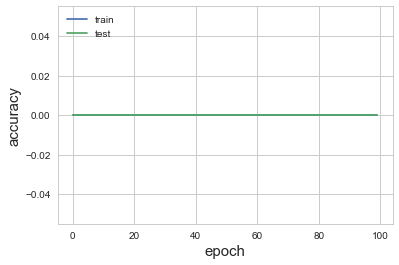

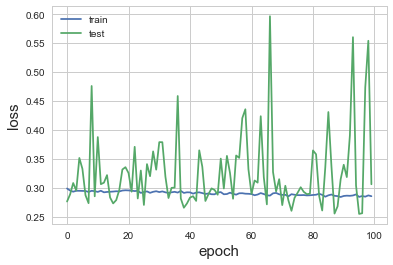

('MSE: ', 210.687514418474)


In [215]:
train_history_prediction_plot(100,Xtrain,ytrain_log,Xtest,ytest_log)

We can plot loss function in each epoch using different optimization method (we used stochastic gradient desent):

In [218]:
## plotting loss given various optimizers
def plotting_loss(optmization_method):
    
    
    #activation 
    model = Sequential()
    model.add(Dense(10, input_dim=10, init='glorot_normal', activation='softplus'))
    model.add(Dense(30, init='glorot_normal', activation='softplus'))
    model.add(Dense(20, init='glorot_normal', activation='softplus'))
    model.add(Dense(10, init='glorot_normal', activation='softplus'))
    model.add(Dense(1, activation='softplus'))

    ## compile the model
    model.compile(loss='mse', optimizer = optmization_method)
    model_history = model.fit(Xtrain, ytrain_log, nb_epoch = 100, batch_size=10, verbose=1 , validation_data=(Xtest, ytest_log))    
      
    # summarize history for loss
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.ylabel('loss', fontsize=15)
    plt.xlabel('epoch', fontsize=15)
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softplus", kernel_initializer="glorot_normal", input_dim=10)`
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="softplus", kernel_initializer="glorot_normal")`
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, activation="softplus", kernel_initializer="glorot_normal")`
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softplus", kernel_initializer="glorot_normal")`


Train on 8645 samples, validate on 2278 samples
Epoch 1/100
8645/8645 [==============================] - 0s - loss: 0.5367 - val_loss: 0.4915
Epoch 2/100
8645/8645 [==============================] - 0s - loss: 0.4389 - val_loss: 0.4416

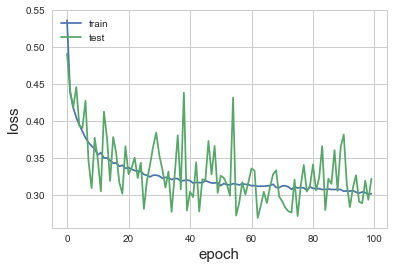

In [219]:
plotting_loss('SGD')

Let's see how it looks like with Adam optimization method which is an algorithm for first-order gradient-based optimization of stochastic objective functions, based on adaptive estimates of lower-order moments.

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softplus", kernel_initializer="glorot_normal", input_dim=10)`
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="softplus", kernel_initializer="glorot_normal")`
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, activation="softplus", kernel_initializer="glorot_normal")`
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softplus", kernel_initializer="glorot_normal")`


Train on 8645 samples, validate on 2278 samples
Epoch 1/100
8645/8645 [==============================] - 0s - loss: 0.6021 - val_loss: 0.3667
E

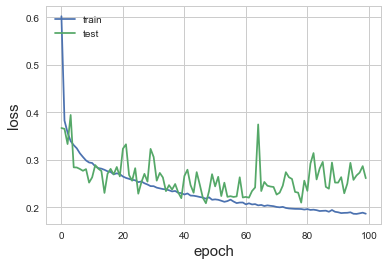

In [220]:
from keras.optimizers import Adam
plotting_loss('Adam')

It seems Adam performance is better than SGD, however, it starts to overfit the data. We rerun the model with Adams:

In [221]:
adam=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='mse', optimizer='Adam', metrics=['accuracy'])

# print initial weights
weights = model.layers[0].get_weights()
model_status = model.fit(Xtrain, ytrain_log, nb_epoch = 100, batch_size=10, verbose=1 , validation_data=(Xtest, ytest_log))    

Train on 8645 samples, validate on 2278 samples
Epoch 1/100
8645/8645 [==============================] - 0s - loss: 0.2781 - acc: 0.0000e+00 - val_loss: 0.2972 - val_acc: 0.0000e+00

In [222]:
nn_pred_a=model.predict(Xtest)

In [223]:
print "R squared Value For NN with Adam: ",metrics.r2_score(ytest_log, nn_pred)
print "RMSE Value For NN with Adam: ",metrics.mean_squared_error(ytest_log,nn_pred)

R squared Value For NN with Adam:  0.640368764229
RMSE Value For NN with Adam:  0.313717745574


There is not that much improvement compared with SGD.
In the future we may use a convolution layer with a pooling layer.

# Classification

We thought turning the problem into a classification problem would allow for a better interpretation of how well the model is performing. We turn number of Calls to four different classes: low (1,5), medium (5,10), high (10,25) and extraordinary (25,250). You can see the histogram of this variable:

In [314]:
ytrain_c=np.digitize(ytrain,bins=np.array([1,5,10,25,250]))
ytest_c=np.digitize(ytest,bins=np.array([1,5,10,25,250]))

 None]

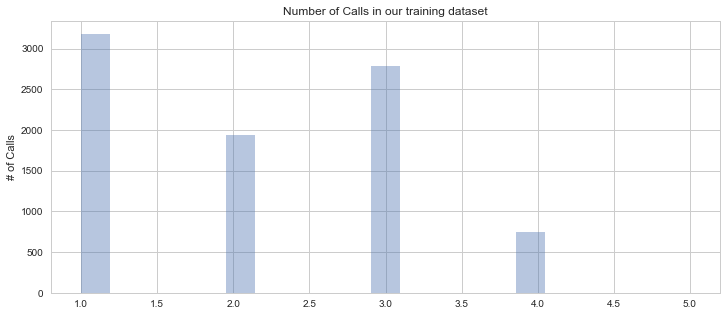

In [292]:
fig,(ax1) = plt.subplots(ncols=1)
fig.set_size_inches(12, 5)
sns.distplot( ytrain_c,ax=ax1,kde=False)
ax1.set( ylabel='# of Calls',title='Number of Calls in our training dataset',label='big')

In the following we implemented and hyper tuned Random Forest:

In [302]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid
from sklearn import cross_validation


rf_c = RandomForestClassifier()
ntrees = {'n_estimators': [10,100,250,500,1000,2500,5000]}
kf_5 = cross_validation.KFold(Xtrain.shape[0], n_folds= 5, shuffle = True, random_state = 0)  #5-fold cros


#tuning parameters
grid_rf_c = GridSearchCV(
    rf_c,
    ntrees,  # parameters to tune 
    n_jobs=-1,  # number of cores to use 
    scoring='accuracy',  # what score are we optimizing?
    cv = kf_5
)



In [299]:
ytrain_c=np.array(ytrain_c)
Xtrain_en=np.array(Xtrain_en)

In [303]:
rbf_c_x = grid_rf_c.fit(Xtrain, ytrain_c)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_estimator.fit(X, y, **self.fit_params)


Optimal Number of Trees:

In [304]:
rbf_c_x.best_params_

{'n_estimators': 250}

In [305]:
rbf_c_x_prob = rbf_c_x.predict_proba(Xtest)
rbf_c_x_pred = rbf_c_x.predict(Xtest)

Confusion Matrix:

In [315]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, precision_recall_curve

pd.DataFrame(confusion_matrix(ytest_c, rbf_c_x_pred))

,0,1,2,3
0,687,25,11,1
1,177,177,73,1
2,53,178,563,14
3,2,13,266,37


Classification Report:

In [317]:
print classification_report(ytest_c, rbf_c_x_pred)

             precision    recall  f1-score   support

          1       0.75      0.95      0.84       724
          2       0.45      0.41      0.43       428
          3       0.62      0.70      0.65       808
          4       0.70      0.12      0.20       318

avg / total       0.64      0.64      0.61      2278



We can see the average f1-score is 0.61 and the accuracy of RF is 64%. 

__Adaboost__

Hyper tuning adaboost using 5-fold CV

In [325]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
adaboost = AdaBoostClassifier()
n_est = {'n_estimators' : [10, 20, 50]}
adb = GridSearchCV(adaboost,
                  n_est,
                  cv = kf_5,
                  n_jobs = -1,
                  scoring = 'accuracy',
                  refit = True)

In [326]:
adb_c_x = adb.fit(Xtrain, ytrain_c)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The best maximum number of estimators at which boosting is terminated:

In [327]:
adb_c_x.best_params_

{'n_estimators': 10}

In [329]:
adb_prob = adb_c_x.predict_proba(Xtest)
adb_pred = adb_c_x.predict(Xtest)

Confusion Matrix:

In [330]:
pd.DataFrame(confusion_matrix(ytest_c, adb_pred))

,0,1,2,3
0,663,30,31,0
1,191,99,138,0
2,97,80,631,0
3,6,3,309,0


Classifier Report:

In [331]:
print classification_report(ytest_c, adb_pred)

             precision    recall  f1-score   support

          1       0.69      0.92      0.79       724
          2       0.47      0.23      0.31       428
          3       0.57      0.78      0.66       808
          4       0.00      0.00      0.00       318

avg / total       0.51      0.61      0.54      2278



C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The average f1-score is 0.54 and the accuracy is 61%.

__SVM:__

Hyper Tuning:

In [338]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

pipeline_svm = Pipeline([('classifier', SVC(probability=True)),])


param_svm = [                                  #  parameters to automatically explore and tune
  {'classifier__C':  [0.01, 1, 10], 
   'classifier__gamma':  [0.01, 1, 10] },
]

#tuning parameters
grid_svm = GridSearchCV(
    pipeline_svm,
    param_grid=param_svm,  # parameters to tune 
    n_jobs=-1,  # number of cores to use 
    scoring='accuracy',  # what score are we optimizing?
    cv = kf_5
)

In [339]:
svm = grid_svm.fit(Xtrain, ytrain_c)

In [340]:
svm.best_params_

{'classifier__C': 1, 'classifier__gamma': 0.01}

In [341]:
svm_prob = svm.predict_proba(Xtest)
svm_pred = svm.predict(Xtest)

Confusion Matrix:

In [342]:
pd.DataFrame(confusion_matrix(ytest_c, svm_pred))

,0,1,2,3
0,675,28,21,0
1,199,147,82,0
2,94,144,567,3
3,17,12,286,3


Classification Report:

In [343]:
print classification_report(ytest_c, svm_pred)

             precision    recall  f1-score   support

          1       0.69      0.93      0.79       724
          2       0.44      0.34      0.39       428
          3       0.59      0.70      0.64       808
          4       0.50      0.01      0.02       318

avg / total       0.58      0.61      0.55      2278



The accuracy in SVM is also 61%, but it outperforms adaboost in precision.